In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import metrics

# to be able to reproduce the same results on every run 
# let's already generate the random seed
np.random.seed(444)

%matplotlib inline

# Generate dataset
true_labels = ['C1', 'C2', 'C3']
dataset = pd.DataFrame(np.random.randn(100, 20), index=range(0,100), columns=list('ABCDEFGHIJKLMNOPQRST'))
dataset['label'] = [true_labels[np.random.randint(0,3)] for _ in range(len(dataset.index))]
label_index = dataset.loc[:, 'label']

/Users/jean/miniconda3/envs/DS/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
# Show some information about the data
dataset.head()

,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,T,label
0,0.357440,0.377538,1.382338,1.175549,-0.939276,-1.143150,-0.542440,-0.548708,0.208520,0.212690,...,-0.807303,-3.303072,-0.806650,-0.360329,-0.880396,0.152631,0.250250,0.078508,-0.903904,C3
1,0.493282,1.753644,0.574751,-0.031397,0.697150,0.810017,0.086494,0.260619,-0.761182,0.686478,...,-0.480331,0.300781,-0.179054,1.183669,-0.110787,0.308326,1.788076,-2.392712,0.626777,C1
2,0.027123,-0.171530,1.415373,-0.913075,-0.648337,-0.622768,-0.200700,-0.016981,-1.580155,-1.272956,...,-0.002065,-0.945969,0.928850,2.435089,0.904235,1.454279,0.571817,-0.329118,0.012958,C1
3,0.353728,-0.433926,-0.498028,0.228771,-0.650078,0.467718,-0.978244,1.622561,0.943451,0.645811,...,-0.369971,-1.083235,1.666211,0.811157,-1.162884,-1.364761,0.073522,-0.158240,1.309005,C3
4,-1.621449,-1.223276,0.258372,0.540705,-0.210238,-0.824710,1.009086,0.605740,0.348214,-0.139900,...,-0.886787,0.107101,-0.740890,-0.075697,0.472508,0.433292,-1.145501,1.959270,0.433279,C2


In [3]:
# Show some statistics about the data (non numerical columns ignored)
dataset.describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.147246,-0.016829,0.032146,-0.067799,-0.127173,0.080271,-0.231629,-0.057389,-0.182106,-0.111053,-0.306319,0.022374,-0.119814,0.015151,-0.073910,-0.067701,-0.017850,-0.088423,0.217254,0.022452
std,1.065652,0.993739,0.892791,1.021343,1.110892,1.039679,1.048322,0.946283,1.034569,0.881900,1.021584,1.013679,0.969198,1.073577,1.063627,1.037555,1.109766,0.983539,1.048412,0.841791
min,-2.285372,-2.155113,-1.742443,-2.623664,-2.834745,-2.799737,-2.654903,-2.868767,-3.233325,-2.278830,-2.478184,-2.627924,-3.303072,-2.711222,-3.049091,-2.212020,-2.714599,-1.803911,-2.546971,-1.846725
25%,-0.566214,-0.794952,-0.558909,-0.719974,-0.685450,-0.654558,-0.831611,-0.788732,-0.857424,-0.592522,-0.985589,-0.525243,-0.667049,-0.763608,-0.864929,-0.831302,-0.718288,-0.735946,-0.427160,-0.442690
50%,0.261560,-0.103553,-0.020252,0.027294,0.038113,0.032105,-0.347575,0.017867,-0.192197,-0.198932,-0.326132,0.033325,0.016902,0.003738,-0.018099,-0.066121,-0.015399,-0.205282,0.185297,-0.009362
75%,0.876555,0.614517,0.617171,0.699858,0.603205,0.819134,0.363743,0.620349,0.452829,0.421432,0.372218,0.657084,0.410630,0.857402,0.650994,0.606593,0.642235,0.448043,0.894857,0.627935
max,2.493710,2.447758,2.588161,2.027379,2.085555,2.539792,2.460522,1.763127,2.849136,2.819935,1.865407,3.538236,2.409662,3.002912,2.435089,3.159013,3.145622,2.320298,2.869191,2.870687


In [4]:
# What are the labels (target class values) in out dataset?
label_index.head()

0    C3
1    C1
2    C1
3    C3
4    C2
Name: label, dtype: object

In [5]:
# We can also remove the lables in case we want to run some unsupervised algorithm
X = dataset.iloc[:, :len(dataset.columns) -1]

# Show the data set without the class column
X.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T
0,0.357440,0.377538,1.382338,1.175549,-0.939276,-1.143150,-0.542440,-0.548708,0.208520,0.212690,1.268021,-0.807303,-3.303072,-0.806650,-0.360329,-0.880396,0.152631,0.250250,0.078508,-0.903904
1,0.493282,1.753644,0.574751,-0.031397,0.697150,0.810017,0.086494,0.260619,-0.761182,0.686478,0.266873,-0.480331,0.300781,-0.179054,1.183669,-0.110787,0.308326,1.788076,-2.392712,0.626777
2,0.027123,-0.171530,1.415373,-0.913075,-0.648337,-0.622768,-0.200700,-0.016981,-1.580155,-1.272956,-1.771348,-0.002065,-0.945969,0.928850,2.435089,0.904235,1.454279,0.571817,-0.329118,0.012958
3,0.353728,-0.433926,-0.498028,0.228771,-0.650078,0.467718,-0.978244,1.622561,0.943451,0.645811,-2.439433,-0.369971,-1.083235,1.666211,0.811157,-1.162884,-1.364761,0.073522,-0.158240,1.309005
4,-1.621449,-1.223276,0.258372,0.540705,-0.210238,-0.824710,1.009086,0.605740,0.348214,-0.139900,-0.536561,-0.886787,0.107101,-0.740890,-0.075697,0.472508,0.433292,-1.145501,1.959270,0.433279


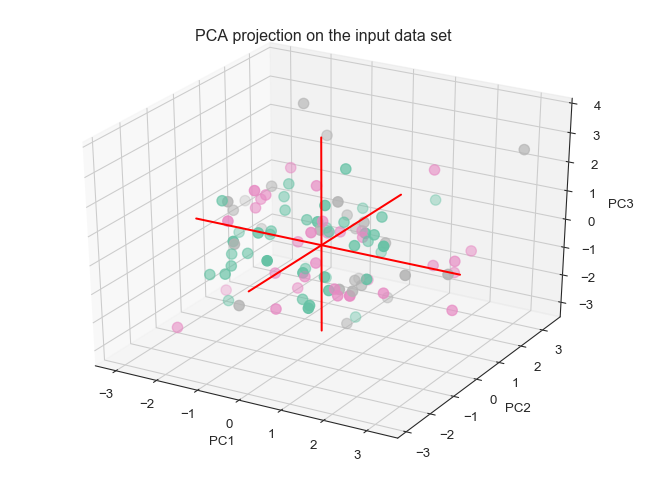

In [6]:
# Plot the input data projection (the ground truth)

from sklearn.decomposition import PCA
import seaborn as sns

sns.set_style("white")

# Use the labels to define colors
categorical_labels = pd.Categorical(label_index)
my_color = categorical_labels.codes

# Run The PCA
pca = PCA(n_components = 3)
pca.fit(X)

# Transform the instances using the PCA and store the result in a data frame
result = pd.DataFrame(pca.transform(X), columns = ['PCA%i' % i for i in range(3)], index = X.index)

# Plot initialisation
my_dpi=96
fig = plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c = my_color, cmap = "Set2_r", s = 60)

# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')

yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')

zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA projection on the input data set")
plt.show()